### Notebook *NB01b - Preprocesado financiero (targets y features)*  
**Autor:** Jesús Daniel Romeral Cortina

**Objetivo:**

Transformación de los datos financieros y definición de variables predictoras y objetivos: 
Limpieza del CSV.
Cálculo de retornos.
Targets binarios (1d, 5d).
Features técnicas básicas (lags, medias, volatilidad).
Dataset financiero “sp500_model”.



In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


plt.style.use("seaborn-v0_8")


In [3]:
DATA_IN_PATH  = "../../datos/sp500_ohlcv_2010_2025.csv"
DATA_OUT_PATH = "../../datos/sp500_model.csv"

In [4]:
sp500 = pd.read_csv (DATA_IN_PATH)
sp500.head()


,Price,Close,High,Low,Open,Volume
0,Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
1,Date,NaN,NaN,NaN,NaN,NaN
2,2010-01-04,1132.989990234375,1133.8699951171875,1116.56005859375,1116.56005859375,3991400000
3,2010-01-05,1136.52001953125,1136.6300048828125,1129.6600341796875,1132.6600341796875,2491020000
4,2010-01-06,1137.1400146484375,1139.18994140625,1133.949951171875,1135.7099609375,4972660000


In [5]:

sp500 = sp500.drop(index=[0,1]).reset_index(drop=True)
sp500 = sp500.rename(columns={"Price":"Date"})
sp500["Date"] = pd.to_datetime(sp500["Date"])

cols = ["Close", "High", "Low", "Open", "Volume"]
sp500[cols] = sp500[cols].apply(pd.to_numeric)
sp500 = sp500.sort_values("Date").reset_index(drop=True)

print(sp500["Date"].min())
print(sp500["Date"].max())

sp500.head()


2010-01-04 00:00:00
2025-11-28 00:00:00


,Date,Close,High,Low,Open,Volume
0,2010-01-04,1132.989990,1133.869995,1116.560059,1116.560059,3991400000
1,2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2491020000
2,2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4972660000
3,2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5270680000
4,2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4389590000


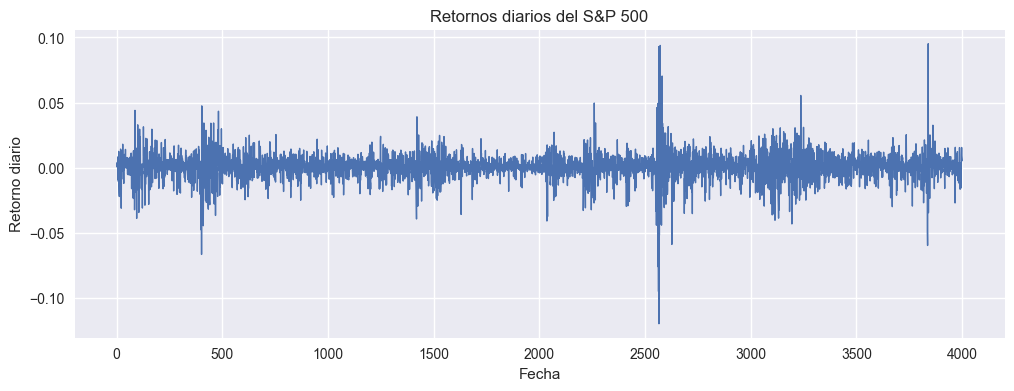

In [6]:
sp500["Return"] = sp500["Close"].pct_change()

plt.figure(figsize=(12,4))
plt.plot(sp500["Return"], linewidth=1)
plt.title("Retornos diarios del S&P 500")
plt.xlabel("Fecha")
plt.ylabel("Retorno diario")
plt.show()




In [7]:
sp500["Target_1d"] = (sp500["Return"].shift(-1) > 0).astype(int)

sp500["Return_5d_forward"] = sp500["Close"].shift(-5) / sp500["Close"] - 1
sp500["Target_5d"] = (sp500["Return_5d_forward"] > 0).astype(int)


sp500[["Date","Return", "Target_1d","Return_5d_forward","Target_5d"]].head(10)


,Date,Return,Target_1d,Return_5d_forward,Target_5d
0,2010-01-04,NaN,1,0.012348,1
1,2010-01-05,0.003116,1,-0.000264,0
2,2010-01-06,0.000546,1,0.007510,1
3,2010-01-07,0.004001,1,0.005930,1
4,2010-01-08,0.002882,1,-0.007817,0
5,2010-01-11,0.001747,0,0.002834,1
6,2010-01-12,-0.009381,1,0.001602,1
7,2010-01-13,0.008326,1,-0.025487,0
8,2010-01-14,0.002426,0,-0.049370,0
9,2010-01-15,-0.010823,1,-0.034550,0


In [8]:
frec_clases = sp500["Target_1d"].value_counts()

print("Frecuencia de clases:")
print(frec_clases)




Frecuencia de clases:
Target_1d
1    2188
0    1814
Name: count, dtype: int64


In [9]:
sp500["ret_lag_1"] = sp500["Return"].shift(1)
sp500["ret_lag_2"] = sp500["Return"].shift(2)
sp500["ret_lag_3"] = sp500["Return"].shift(3)
sp500["ret_lag_4"] = sp500["Return"].shift(4)
sp500["ret_lag_5"] = sp500["Return"].shift(5)


sp500["ret_ma_5"] = sp500["Return"].rolling(window=5).mean()
sp500["ret_std_5"] = sp500["Return"].rolling(window=5).std()
sp500["ret_ma_10"] = sp500["Return"].rolling(window=10).mean()
sp500["ret_std_10"] = sp500["Return"].rolling(window=10).std()


sp500.head()



,Date,Close,High,Low,Open,Volume,Return,Target_1d,Return_5d_forward,Target_5d,ret_lag_1,ret_lag_2,ret_lag_3,ret_lag_4,ret_lag_5,ret_ma_5,ret_std_5,ret_ma_10,ret_std_10
0,2010-01-04,1132.989990,1133.869995,1116.560059,1116.560059,3991400000,NaN,1,0.012348,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2491020000,0.003116,1,-0.000264,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4972660000,0.000546,1,0.007510,1,0.003116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5270680000,0.004001,1,0.005930,1,0.000546,0.003116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4389590000,0.002882,1,-0.007817,0,0.004001,0.000546,0.003116,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:

start_date = pd.Timestamp("2013-01-01")
end_date = pd.Timestamp("2024-03-04")


sp500 = sp500[ (sp500["Date"] >= start_date) & (sp500["Date"] <= end_date)].reset_index(drop=True)

In [11]:
sp500.to_csv((DATA_OUT_PATH), index=False)

if os.path.exists(DATA_OUT_PATH): 
    print(f"Archivo guardado correctamente en {DATA_OUT_PATH}") 
else: 
    print("Error: el archivo no se ha guardado.")

Archivo guardado correctamente en ../../datos/sp500_model.csv
